In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from PIL import ImageOps, Image
import itertools
import os
import shutil
import random
import glob

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

2.9.1


In [2]:
# # Organise data into train, valid, test dirs
# os.chdir('durians_dataset')
# if os.path.isdir('train/D24') is False:
#     os.makedirs('train/D24')
#     os.makedirs('train/D197')
#     os.makedirs('train/D198')
#     os.makedirs('train/D200')
#     os.makedirs('valid/D24')
#     os.makedirs('valid/D197')
#     os.makedirs('valid/D198')
#     os.makedirs('valid/D200')
#     os.makedirs('test/D24')
#     os.makedirs('test/D197')
#     os.makedirs('test/D198')
#     os.makedirs('test/D200')

# for c in random.sample(glob.glob('D24/*'), 50):
#     shutil.move(c, 'train/D24')
# for c in random.sample(glob.glob('D197/*'), 50):
#     shutil.move(c, 'train/D197')
# for c in random.sample(glob.glob('D198/*'), 50):
#     shutil.move(c, 'train/D198')
# for c in random.sample(glob.glob('D200/*'), 50):
#     shutil.move(c, 'train/D200')
# for c in random.sample(glob.glob('D24/*'), 14):
#     shutil.move(c, 'valid/D24')
# for c in random.sample(glob.glob('D197/*'), 14):
#     shutil.move(c, 'valid/D197')
# for c in random.sample(glob.glob('D198/*'), 14):
#     shutil.move(c, 'valid/D198')
# for c in random.sample(glob.glob('D200/*'), 14):
#     shutil.move(c, 'valid/D200')
# for c in random.sample(glob.glob('D24/*'), 7):
#     shutil.move(c, 'test/D24')
# for c in random.sample(glob.glob('D197/*'), 7):
#     shutil.move(c, 'test/D197')
# for c in random.sample(glob.glob('D198/*'), 7):
#     shutil.move(c, 'test/D198')
# for c in random.sample(glob.glob('D200/*'), 7):
#     shutil.move(c, 'test/D200')

In [2]:
# Organise data into train, valid, test dirs
os.chdir('durians_dataset')
if os.path.isdir('train/D13') is False:
    os.makedirs('train/D13')
    os.makedirs('train/D24')
    os.makedirs('train/D197')
    os.makedirs('valid/D13')
    os.makedirs('valid/D24')
    os.makedirs('valid/D197')
    os.makedirs('test/D13')
    os.makedirs('test/D24')
    os.makedirs('test/D197')

    for c in random.sample(glob.glob('D13/*'), 253):
        shutil.move(c, 'train/D13')
    for c in random.sample(glob.glob('D24/*'), 253):
        shutil.move(c, 'train/D24')
    for c in random.sample(glob.glob('D197/*'), 253):
        shutil.move(c, 'train/D197')
    for c in random.sample(glob.glob('D13/*'), 72):
        shutil.move(c, 'valid/D13')
    for c in random.sample(glob.glob('D24/*'), 72):
        shutil.move(c, 'valid/D24')
    for c in random.sample(glob.glob('D197/*'), 72):
        shutil.move(c, 'valid/D197')
    for c in random.sample(glob.glob('D13/*'), 36):
        shutil.move(c, 'test/D13')
    for c in random.sample(glob.glob('D24/*'), 36):
        shutil.move(c, 'test/D24')
    for c in random.sample(glob.glob('D197/*'), 36):
        shutil.move(c, 'test/D197')

In [3]:
train_path = 'C:\\Users\\tanke\\Python_Projects\\Project_Learn_Deep_Learning\\durians_dataset\\train'
valid_path = 'C:\\Users\\tanke\\Python_Projects\\Project_Learn_Deep_Learning\\durians_dataset\\valid'
test_path = 'C:\\Users\\tanke\\Python_Projects\\Project_Learn_Deep_Learning\\durians_dataset\\test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(128,128), classes=['D13','D24','D197'], batch_size=32, keep_aspect_ratio=True)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(128,128), classes=['D13','D24','D197'], batch_size=10, keep_aspect_ratio=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(128,128), classes=['D13','D24','D197'], batch_size=5, keep_aspect_ratio=True, shuffle=False)

Found 759 images belonging to 3 classes.
Found 216 images belonging to 3 classes.
Found 108 images belonging to 3 classes.


In [6]:
# def to_grayscale_then_rgb(image):
#     image = tf.image.rgb_to_grayscale(image)
#     image = tf.image.grayscale_to_rgb(image)
#     return image

# train_batches = ImageDataGenerator(rescale=1/255,
#                                    preprocessing_function=to_grayscale_then_rgb) \
#     .flow_from_directory(directory=train_path, target_size=(128,128), classes=['D13','D24','D197'], batch_size=32, keep_aspect_ratio=True)
# valid_batches = ImageDataGenerator(rescale=1/255,
#                                    preprocessing_function=to_grayscale_then_rgb) \
#     .flow_from_directory(directory=valid_path, target_size=(128,128), classes=['D13','D24','D197'], batch_size=10, keep_aspect_ratio=True)
# test_batches = ImageDataGenerator(rescale=1/255,
#                                    preprocessing_function=to_grayscale_then_rgb) \
#     .flow_from_directory(directory=test_path, target_size=(128,128), classes=['D13','D24','D197'], batch_size=5, keep_aspect_ratio=True, shuffle=False)

In [5]:
assert train_batches.n == 759
assert valid_batches.n == 216
assert test_batches.n == 108
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 3

In [6]:
imgs, labels = next(train_batches)
print(imgs[0].shape)

(128, 128, 3)


In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

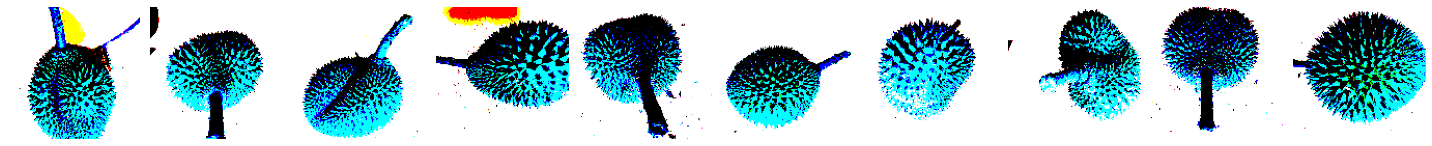

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [8]:
plotImages(imgs)
print(labels)

In [9]:
#defining model
cnn_model=Sequential()
#adding 1st convolution layer
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3),activation='relu',input_shape=imgs[0].shape))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
#adding pooling layer
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.1))

#2nd layer which is similar to 1st layer except wo the input shape and filter is 64
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
#adding pooling layer
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.1))

#3rd layer which is similar to 1st layer except wo the input shape and filter is 64
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
#adding pooling layer
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.1))

#adding fully connected layer
cnn_model.add(Flatten())
#Add the fully connected ANN with 128 neurons
cnn_model.add(Dense(256,activation='relu'))
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dense(32,activation='relu'))
#adding output layer
cnn_model.add(Dense(3,activation='softmax'))

In [10]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 128)     147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 61, 61, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 59, 59, 64)        73792     
                                                        

In [11]:
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model_info = cnn_model.fit(x=train_batches, validation_data=valid_batches, epochs =7, verbose=2)

Epoch 1/7
24/24 - 137s - loss: 1.0909 - accuracy: 0.3979 - val_loss: 1.0362 - val_accuracy: 0.4769 - 137s/epoch - 6s/step
Epoch 2/7
24/24 - 108s - loss: 1.0305 - accuracy: 0.4769 - val_loss: 0.9492 - val_accuracy: 0.5602 - 108s/epoch - 5s/step
Epoch 3/7
24/24 - 164s - loss: 0.9661 - accuracy: 0.5336 - val_loss: 0.9305 - val_accuracy: 0.5972 - 164s/epoch - 7s/step
Epoch 4/7
24/24 - 165s - loss: 0.9073 - accuracy: 0.5784 - val_loss: 0.8961 - val_accuracy: 0.5972 - 165s/epoch - 7s/step
Epoch 5/7
24/24 - 166s - loss: 0.8298 - accuracy: 0.6232 - val_loss: 0.8156 - val_accuracy: 0.6250 - 166s/epoch - 7s/step
Epoch 6/7
24/24 - 158s - loss: 0.7563 - accuracy: 0.6680 - val_loss: 0.7362 - val_accuracy: 0.6759 - 158s/epoch - 7s/step
Epoch 7/7
24/24 - 151s - loss: 0.7212 - accuracy: 0.6640 - val_loss: 0.7209 - val_accuracy: 0.7083 - 151s/epoch - 6s/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


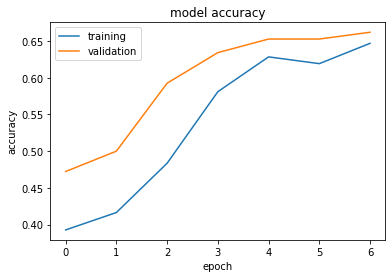

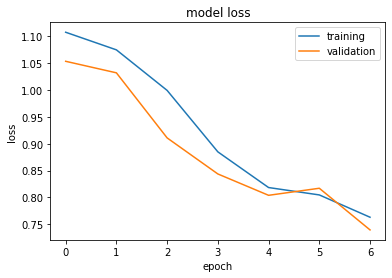

In [15]:
# list all data in history
print(model_info.history.keys())

# summarize history for accuracy
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
# summarize history for loss
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


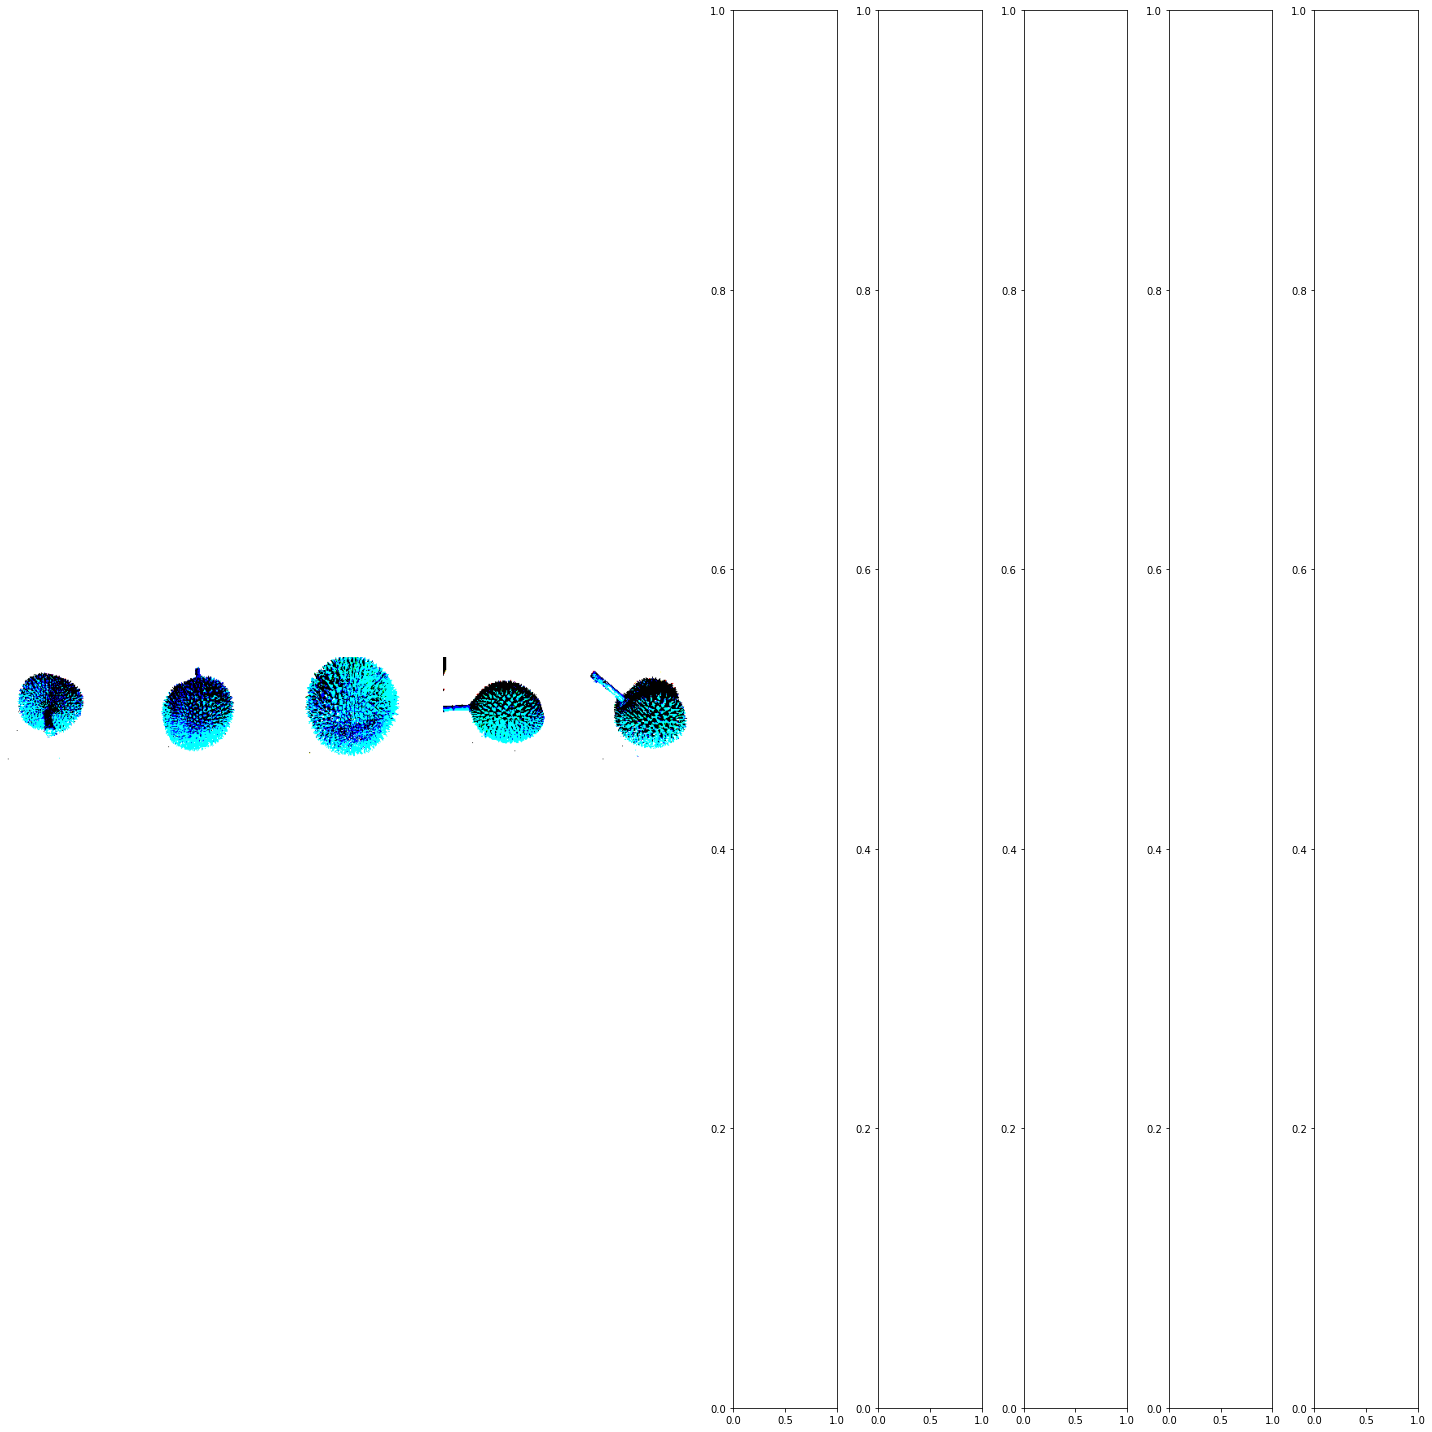

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [16]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [17]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
predictions = cnn_model.predict(x=test_batches, verbose=0)

In [15]:
np.round(predictions)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [20]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [21]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalized=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [22]:
test_batches.class_indices

{'D13': 0, 'D24': 1, 'D197': 2}

confusion matrix, without normalization


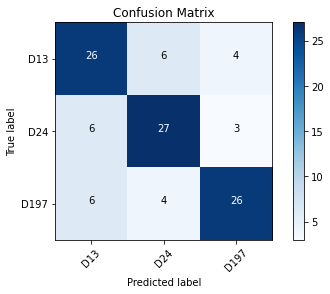

In [23]:
cm_plot_labels = ["D13","D24","D197"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [24]:
cnn_model.save('durian_classification_trained_model.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=576x768 at 0x2C5010F2BC0>
(128, 3)
[0.19518979 0.58016205 0.2246482 ]
{'class1': 'D24', 'class2': 'D197', 'class3': 'D13', 'prob1': 0.58016205, 'prob2': 0.2246482, 'prob3': 0.19518979}


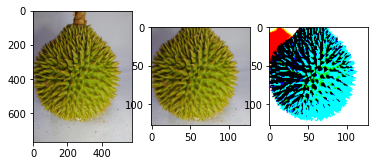

In [23]:
#Step 1
# my_image = plt.imread(os.path.join('uploads', filename))
# img = plt.imread("C:\\Users\\tanke\\Python_Projects\\Project_Learn_Deep_Learning\\durians_dataset\\D13\\P_20200815_150324.jpg")
img = Image.open("C:\\Users\\tanke\\Python_Projects\\Project_Learn_Deep_Learning\\durians_dataset\\D24\\P_20200817_114123_SRES.jpg")
print(img)
#Step 2
my_image = ImageOps.fit(img, (128,128))
print(np.array(my_image)[0,:].shape)
my_image_re = tf.keras.applications.vgg16.preprocess_input(np.array(my_image))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(img)
axarr[1].imshow(my_image)
axarr[2].imshow(my_image_re)

#Step 3
#with graph.as_default():
    #set_session(sess)
    #Add
cnn_model.run_eagerly=True  
probabilities = cnn_model.predict(np.array([my_image_re,]), verbose=0)[0,:]
print(probabilities)
#Step 4
number_to_class = ['D13','D24','D197']
index = np.argsort(probabilities)
predictions = {
    "class1":number_to_class[index[2]],
    "class2":number_to_class[index[1]],
    "class3":number_to_class[index[0]],
    "prob1":probabilities[index[2]],
    "prob2":probabilities[index[1]],
    "prob3":probabilities[index[0]],
    }
print(predictions)

In [34]:
print(np.array(my_image)*1./255)

[[[0.51764706 0.50588235 0.54509804]
  [0.51764706 0.50588235 0.54509804]
  [0.51764706 0.50588235 0.54509804]
  ...
  [0.69019608 0.69411765 0.70980392]
  [0.69019608 0.69411765 0.70980392]
  [0.69019608 0.69411765 0.70980392]]

 [[0.50980392 0.49803922 0.54117647]
  [0.50980392 0.49803922 0.54117647]
  [0.50980392 0.49803922 0.54117647]
  ...
  [0.69019608 0.69411765 0.70980392]
  [0.69019608 0.69411765 0.70980392]
  [0.69019608 0.69411765 0.70980392]]

 [[0.50588235 0.49411765 0.5372549 ]
  [0.50588235 0.49411765 0.5372549 ]
  [0.50588235 0.49411765 0.5372549 ]
  ...
  [0.69019608 0.69411765 0.70980392]
  [0.69019608 0.69411765 0.70980392]
  [0.69019608 0.69411765 0.70980392]]

 ...

 [[0.64705882 0.64705882 0.68627451]
  [0.65098039 0.65098039 0.69019608]
  [0.64705882 0.64705882 0.68627451]
  ...
  [0.81176471 0.81960784 0.81568627]
  [0.80784314 0.81568627 0.81176471]
  [0.80784314 0.81568627 0.81176471]]

 [[0.64705882 0.64705882 0.68627451]
  [0.64705882 0.64705882 0.68627451]


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=576x768 at 0x2C5021211E0>
(128, 3)


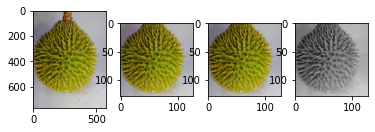

In [39]:
#for predicting using model that was trained by greyscale images data

# #Step 1
# # my_image = plt.imread(os.path.join('uploads', filename))
# # img = plt.imread("C:\\Users\\tanke\\Python_Projects\\Project_Learn_Deep_Learning\\durians_dataset\\D13\\P_20200815_150324.jpg")
# img = Image.open("C:\\Users\\tanke\\Python_Projects\\Project_Learn_Deep_Learning\\durians_dataset\\D24\\P_20200817_114123_SRES.jpg")
# print(img)
# #Step 2
# my_image = ImageOps.fit(img, (128,128))
# print(np.array(my_image)[0,:].shape)
# my_image_rescale = np.array(my_image)*1./255
# my_image_greyscale = to_grayscale_then_rgb(my_image_rescale)
# f, axarr = plt.subplots(1,4)
# axarr[0].imshow(img)
# axarr[1].imshow(my_image)
# axarr[2].imshow(my_image_rescale)
# axarr[3].imshow(my_image_greyscale)

#Step 3
#with graph.as_default():
    #set_session(sess)
    #Add
# cnn_model.run_eagerly=True  
# probabilities = cnn_model.predict(np.array([my_image_re,]), verbose=0)[0,:]
# print(probabilities)
# #Step 4
# number_to_class = ['D13','D24','D197']
# index = np.argsort(probabilities)
# predictions = {
#     "class1":number_to_class[index[2]],
#     "class2":number_to_class[index[1]],
#     "class3":number_to_class[index[0]],
#     "prob1":probabilities[index[2]],
#     "prob2":probabilities[index[1]],
#     "prob3":probabilities[index[0]],
#     }
# print(predictions)